In [3]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import rdkit
print(rdkit.__version__)

2020.09.1


matched 20 of 20


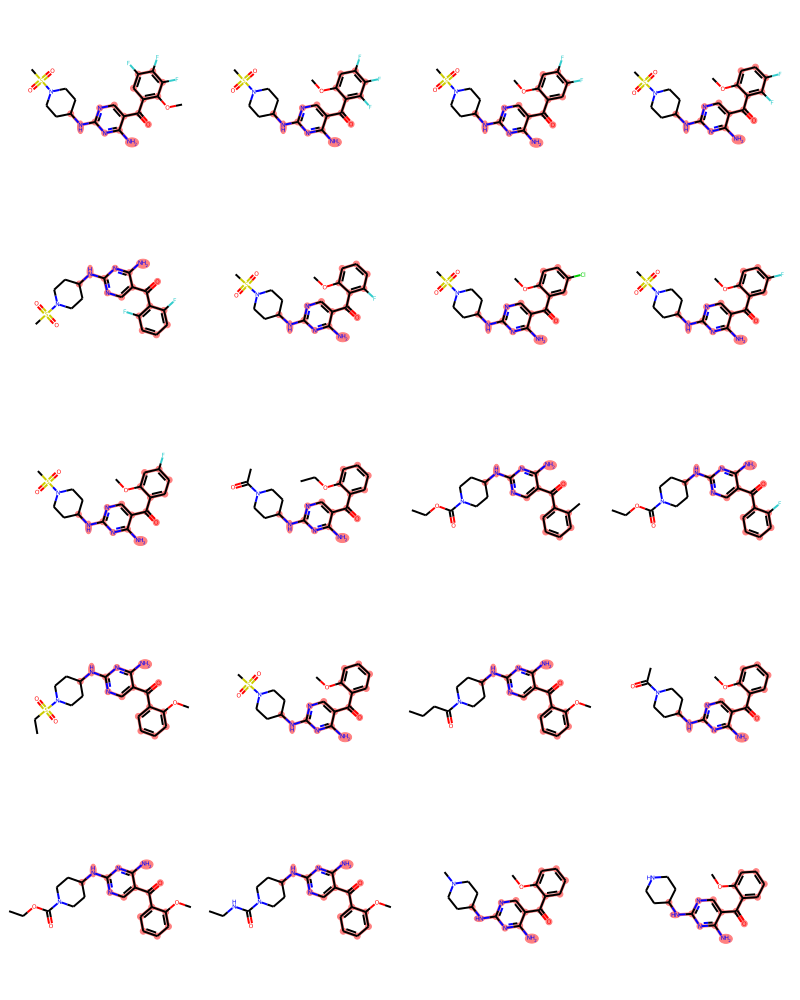

In [7]:
sample_smarts = '[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@1-&!@[#6&!R](=&!@[#8&!R])-&!@[#6&R]1:&@[#6&R]:&@[#7&R]:&@[#6&R](:&@[#7&R]:&@[#6&R]:&@1-&!@[#7&!R])-&!@[#7&!R]-&!@[#6&R]'
sample_smiles ='''COc1c(C(=O)c2cnc(NC3CCN(S(C)(=O)=O)CC3)nc2N)cc(F)c(F)c1F
COc1cc(F)c(F)c(F)c1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)CC2)nc1N
COc1cc(F)c(F)cc1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)CC2)nc1N
COc1ccc(F)c(F)c1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)CC2)nc1N
CS(=O)(=O)N1CCC(Nc2ncc(C(=O)c3c(F)cccc3F)c(N)n2)CC1
COc1cccc(F)c1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)CC2)nc1N
COc1ccc(Cl)cc1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)CC2)nc1N
COc1ccc(F)cc1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)CC2)nc1N
COc1cc(F)ccc1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)CC2)nc1N
CCOc1ccccc1C(=O)c1cnc(NC2CCN(C(C)=O)CC2)nc1N
CCOC(=O)N1CCC(Nc2ncc(C(=O)c3ccccc3C)c(N)n2)CC1
CCOC(=O)N1CCC(Nc2ncc(C(=O)c3ccccc3F)c(N)n2)CC1
CCS(=O)(=O)N1CCC(Nc2ncc(C(=O)c3ccccc3OC)c(N)n2)CC1
COc1ccccc1C(=O)c1cnc(NC2CCN(S(C)(=O)=O)CC2)nc1N
CCCC(=O)N1CCC(Nc2ncc(C(=O)c3ccccc3OC)c(N)n2)CC1
COc1ccccc1C(=O)c1cnc(NC2CCN(C(C)=O)CC2)nc1N
CCOC(=O)N1CCC(Nc2ncc(C(=O)c3ccccc3OC)c(N)n2)CC1
CCNC(=O)N1CCC(Nc2ncc(C(=O)c3ccccc3OC)c(N)n2)CC1
COc1ccccc1C(=O)c1cnc(NC2CCN(C)CC2)nc1N
COc1ccccc1C(=O)c1cnc(NC2CCNCC2)nc1N'''.split('\n')
scaff = Chem.MolFromSmarts(sample_smarts)
ms = [Chem.MolFromSmiles(x) for x in sample_smiles]
matched = [m for m in ms if m.HasSubstructMatch(scaff)]
print(f'matched {len(matched)} of {len(ms)}')
matchedAts = [x.GetSubstructMatch(scaff) for x in matched]
Draw.MolsToGridImage(matched,molsPerRow=4,highlightAtomLists=matchedAts)

In [22]:
from rdkit import Chem
from rdkit.Chem import rdqueries
def pruneScaffold(scaff):
    res = Chem.RWMol(scaff)
    Chem.GetSymmSSSR(res)
    ri = res.GetRingInfo()
    toRemove = []
    for at in res.GetAtoms():
        sma = at.GetSmarts()
        if at.GetDegree()==1 and not ri.NumAtomRings(at.GetIdx()) and '&R' in sma:
            nbr = at.GetNeighbors()[0]
            q = Chem.AtomFromSmarts('[D{%d-}]'%(nbr.GetDegree()))
            nbr.ExpandQuery(q)
            toRemove.append(at.GetIdx())
    for aid in sorted(toRemove,reverse=True):
        res.RemoveAtom(aid)
    return Chem.Mol(res)

In [23]:
print(Chem.MolToSmarts(pruneScaffold(scaff)))

[#6&R]1:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@[#6&R]:&@1-&!@[#6&!R](=&!@[#8&!R])-&!@[#6&R]1:&@[#6&R]:&@[#7&R]:&@[#6&R](:&@[#7&R]:&@[#6&R]:&@1-&!@[#7&!R])-&!@[#7&!R&D{2-}]


matched 20 of 20


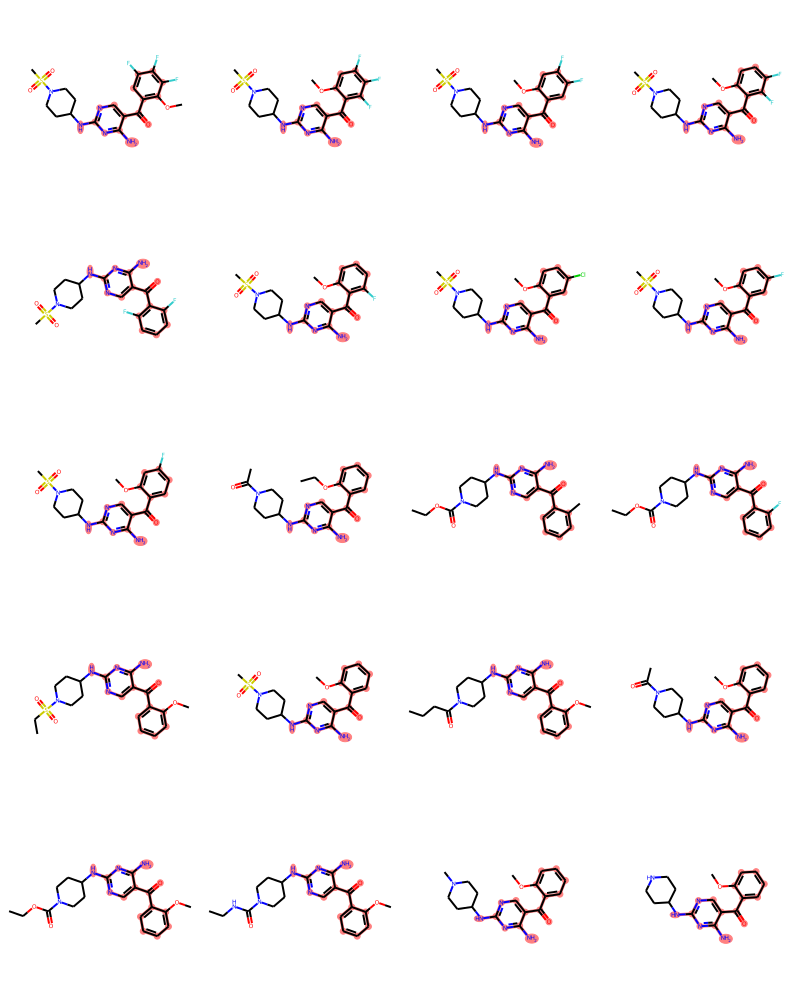

In [24]:
pscaff = pruneScaffold(scaff)
matched = [m for m in ms if m.HasSubstructMatch(pscaff)]
print(f'matched {len(matched)} of {len(ms)}')
matchedAts = [x.GetSubstructMatch(pscaff) for x in matched]
Draw.MolsToGridImage(matched,molsPerRow=4,highlightAtomLists=matchedAts)